In [ ]:
!pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15900 sha256=b17e4e56d96eee083e73b35cc22984cd890a90f488d46c58a91a7f9703a58e34
  Stored in directory: /root/.cache/pip/wheels/c5/ca/73/5cdc3d087111bfbdef90be5457aa03c00c0e32241b2752445c
Successfully built pyforest


In [ ]:
import pyforest

df = pd.read_excel('Dataset_Capstone.xlsx')
# Isi nilai yang hilang dengan string kosong
df['keluhan_baku'] = df['keluhan_baku'].fillna('')
df['keluhan_stopword'] = df['keluhan_stopword'].fillna('')

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12530 entries, 0 to 12529
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         12530 non-null  int64  
 1   keluhan                    12530 non-null  object 
 2   kelurahan_id               12455 non-null  float64
 3   kecamatan_id               12530 non-null  int64  
 4   alamat                     11781 non-null  object 
 5   tanggal_keluhan            12530 non-null  object 
 6   topik_id                   12258 non-null  float64
 7   instansi_id                12530 non-null  int64  
 8   tanggal_ditanggapi         11736 non-null  object 
 9   group_hari_respon_keluhan  11004 non-null  object 
 10  keluhan_clean              12526 non-null  object 
 11  keluhan_baku               12530 non-null  object 
 12  keluhan_stopword           12530 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usag

In [ ]:
instansi = pd.read_csv('mediacenter_instansi_202311220929.csv', sep=';')
instansi = instansi[['id', 'name']]
topik = pd.read_csv('mediacenter_topik_202311230834.csv', sep=';')
topik = topik[['id', 'name','jenis_topik']]
kelurahan = pd.read_csv('mediacenter_kelurahan_202311220929.csv', sep=';')
kelurahan = kelurahan[['id', 'name', 'kecamatan_id']]
kecamatan = pd.read_csv('mediacenter_kecamatan_202311220929.csv', sep=';')
kecamatan = kecamatan[['id', 'name']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_topik = pd.merge(df, topik, how='left', left_on='topik_id', right_on='id')
merged_topik = merged_topik.rename(columns={'id_x':'id', 'name':'topik'})
merged_topik = merged_topik.drop(['id_y', 'jenis_topik', 'topik_id'], axis = 1)

<IPython.core.display.Javascript object>

In [ ]:
merged_instansi = pd.merge(merged_topik, instansi, how='left', left_on='instansi_id', right_on='id')
merged_instansi = merged_instansi.rename(columns={'id_x':'id', 'name':'instansi'})
merged_instansi = merged_instansi.drop(['id_y', 'instansi_id'], axis = 1)

<IPython.core.display.Javascript object>

In [ ]:
merged_instansi_kecamatan = pd.merge(merged_instansi, kecamatan, how='left', left_on='kecamatan_id', right_on='id')
merged_instansi_kelurahan = pd.merge(merged_instansi_kecamatan, kelurahan, how='left', left_on='kelurahan_id', right_on='id')
final_data =  merged_instansi_kelurahan.rename(columns={'name_x':'kecamatan', 'name_y':'kelurahan', 'id_x':'id'})
final_data = final_data.drop(['id_y', 'kelurahan_id', 'kecamatan_id_x',  'kecamatan_id_y'],axis=1)
final_data.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,keluhan,alamat,tanggal_keluhan,tanggal_ditanggapi,group_hari_respon_keluhan,keluhan_clean,keluhan_baku,keluhan_stopword,topik,instansi,kecamatan,id,kelurahan
0,170339,"Assalamualaikum, selamat malam admin, mohon se...","Warkop Jalan Bubutan, sebelah barat Tugu Pahla...",2023-01-23 13:09:00.000,2023-01-24 00:25:03.000,1 Sampai 3 Hari,assalamualaikum selamat malam admin mohon sela...,assalamualaikum selamat malam admin mohon sela...,assalamualaikum selamat malam admin mohon kons...,Parkir,Dinas Perhubungan,Bubutan,NaN,NaN
1,170377,saya ibu rumah tangga 3 orang anak ..posisi ru...,"Jalan Wonorejo III, Wonorejo, Kota Surabaya, J...",2023-01-24 10:26:00.000,2023-01-25 00:12:15.000,1 Sampai 3 Hari,saya ibu rumah tangga 3 orang anak posisi ruma...,saya ibu rumah tangga 3 orang anak posisi ruma...,rumah tangga 3 orang anak posisi rumah kontrak...,MBR,Dinas Sosial,Tegalsari,293.0,Wonorejo Tegalsari
2,170399,pemangkasan pohon palem depan ruko grand city ...,"Jalan Rungkut Madya, Rungkut Kidul, Kota Surab...",2023-01-25 04:36:00.000,2023-01-25 10:03:02.000,Lebih 7 Hari,pemangkasan pohon palem depan ruko grand city ...,pemangkasan pohon palem depan ruko grand city ...,pemangkasan pohon palem ruko grand city regenc...,Informasi Pemangkasan/Perantingan Pohon,Dinas Lingkungan Hidup,Gununganyar,197.0,Rungkut Tengah
3,171803,mohon diperbaiki saluran air karena setelah hu...,dari jalan margomulyo sampai Romo kalisari seb...,2023-02-25 12:01:00.000,2023-02-26 01:39:04.000,1 Sampai 3 Hari,mohon diperbaiki saluran air karena setelah hu...,mohon diperbaiki saluran air karena setelah hu...,mohon diperbaiki saluran air hujan tergenang j...,Saluran Tepi Jalan,Dinas Sumber Daya Air dan Bina Marga,Benowo,165.0,Tambak Oso Wilangun
4,171836,jalan berlubang di belokan pas depan excelso,jalan berlubang di belokan pas excelso jalan b...,2023-02-26 05:57:00.000,2023-02-27 00:50:39.000,4 Sampai 7 Hari,jalan berlubang di belokan pas depan excelso,jalan berlubang di belokan tepat depan excelso,jalan berlubang belokan excelso,Jalan Rusak dan Berlubang,Dinas Sumber Daya Air dan Bina Marga,Gubeng,190.0,Gubeng


In [ ]:
final_data.to_excel('Final Data FIXXXX.xlsx', index = False)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12530 entries, 0 to 12529
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         12530 non-null  int64  
 1   keluhan                    12530 non-null  object 
 2   alamat                     11781 non-null  object 
 3   tanggal_keluhan            12530 non-null  object 
 4   tanggal_ditanggapi         11736 non-null  object 
 5   group_hari_respon_keluhan  11004 non-null  object 
 6   keluhan_clean              12526 non-null  object 
 7   keluhan_baku               12530 non-null  object 
 8   keluhan_stopword           12530 non-null  object 
 9   topik                      12258 non-null  object 
 10  instansi                   12530 non-null  object 
 11  kecamatan                  12530 non-null  object 
 12  id                         12455 non-null  float64
 13  kelurahan                  12455 non-null  obj

In [ ]:
final_data.head()

,keluhan,alamat,tanggal_keluhan,tanggal_ditanggapi,group_hari_respon_keluhan,keluhan_clean,keluhan_baku,keluhan_stopword,topik,instansi,kecamatan,kelurahan
0,"Assalamualaikum, selamat malam admin, mohon se...","Warkop Jalan Bubutan, sebelah barat Tugu Pahla...",2023-01-23 13:09:00.000,2023-01-24 00:25:03.000,1 Sampai 3 Hari,assalamualaikum selamat malam admin mohon sela...,assalamualaikum selamat malam admin mohon sela...,assalamualaikum selamat malam admin mohon kons...,Parkir,Dinas Perhubungan,Bubutan,NaN
1,saya ibu rumah tangga 3 orang anak ..posisi ru...,"Jalan Wonorejo III, Wonorejo, Kota Surabaya, J...",2023-01-24 10:26:00.000,2023-01-25 00:12:15.000,1 Sampai 3 Hari,saya ibu rumah tangga 3 orang anak posisi ruma...,saya ibu rumah tangga 3 orang anak posisi ruma...,rumah tangga 3 orang anak posisi rumah kontrak...,MBR,Dinas Sosial,Tegalsari,Wonorejo Tegalsari
2,pemangkasan pohon palem depan ruko grand city ...,"Jalan Rungkut Madya, Rungkut Kidul, Kota Surab...",2023-01-25 04:36:00.000,2023-01-25 10:03:02.000,Lebih 7 Hari,pemangkasan pohon palem depan ruko grand city ...,pemangkasan pohon palem depan ruko grand city ...,pemangkasan pohon palem ruko grand city regenc...,Informasi Pemangkasan/Perantingan Pohon,Dinas Lingkungan Hidup,Gununganyar,Rungkut Tengah
3,mohon diperbaiki saluran air karena setelah hu...,dari jalan margomulyo sampai Romo kalisari seb...,2023-02-25 12:01:00.000,2023-02-26 01:39:04.000,1 Sampai 3 Hari,mohon diperbaiki saluran air karena setelah hu...,mohon diperbaiki saluran air karena setelah hu...,mohon diperbaiki saluran air hujan tergenang j...,Saluran Tepi Jalan,Dinas Sumber Daya Air dan Bina Marga,Benowo,Tambak Oso Wilangun
4,jalan berlubang di belokan pas depan excelso,jalan berlubang di belokan pas excelso jalan b...,2023-02-26 05:57:00.000,2023-02-27 00:50:39.000,4 Sampai 7 Hari,jalan berlubang di belokan pas depan excelso,jalan berlubang di belokan tepat depan excelso,jalan berlubang belokan excelso,Jalan Rusak dan Berlubang,Dinas Sumber Daya Air dan Bina Marga,Gubeng,Gubeng


In [ ]:
final_data['keluhan'][666]

'apa manfaat yg di dapat dengan stiker yg tertempel di dpn rumah dgn logo "KELUARGA MISKIN" apakah semua rumah dgn stiker tersebut di pastikan mendapat bantuan\\n\\nKENAPA SY BLM MENDAPATKAN MANFAAT DARI STIKER TERSEBUT....\\nKEMANA SAYA JARUS MELAPOR'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-10-31f84f03ed7c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topik_count.values, y=topik_count.index, palette='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

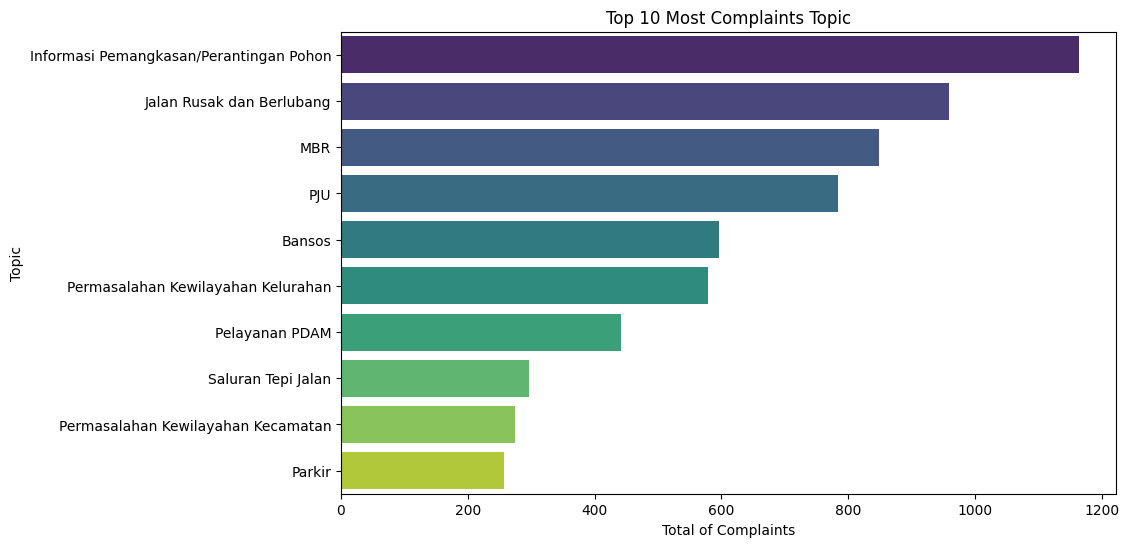

In [ ]:
# @title Top Topik Terbanyak

plt.figure(figsize=(10, 6))
topik_count = final_data['topik'].value_counts().head(10)
sns.barplot(x=topik_count.values, y=topik_count.index, palette='viridis')
plt.title('Top 10 Most Complaints Topic')
plt.xlabel('Total of Complaints')
plt.ylabel('Topic')
plt.show()

In [ ]:
topik_count

Informasi Pemangkasan/Perantingan Pohon    1164
Jalan Rusak dan Berlubang                   959
MBR                                         848
PJU                                         784
Bansos                                      597
Permasalahan Kewilayahan Kelurahan          579
Pelayanan PDAM                              441
Saluran Tepi Jalan                          297
Permasalahan Kewilayahan Kecamatan          274
Parkir                                      257
Name: topik, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-12-bacd6738e934>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=instansi_count.values, y=instansi_count.index, palette='magma')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

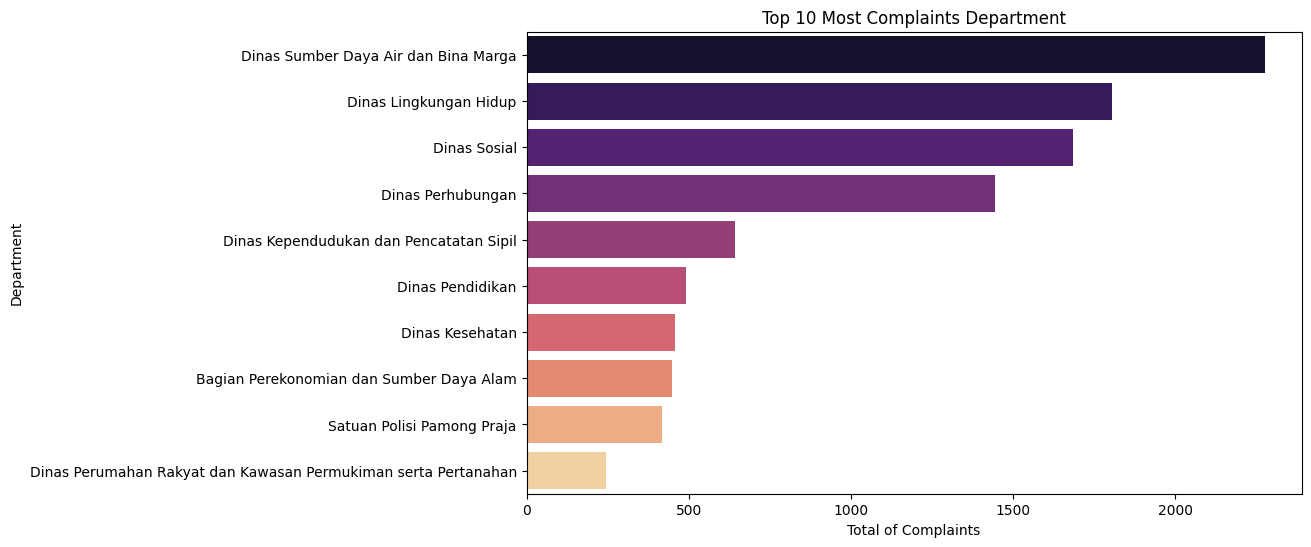

In [ ]:
# @title Top Instansi Terbanyak

plt.figure(figsize=(10, 6))
instansi_count = final_data['instansi'].value_counts().head(10)
sns.barplot(x=instansi_count.values, y=instansi_count.index, palette='magma')
plt.title('Top 10 Most Complaints Department')
plt.xlabel('Total of Complaints')
plt.ylabel('Department')
plt.show()

In [ ]:
instansi_count

Dinas Sumber Daya Air dan Bina Marga                              2275
Dinas Lingkungan Hidup                                            1806
Dinas Sosial                                                      1683
Dinas Perhubungan                                                 1444
Dinas Kependudukan dan Pencatatan Sipil                            643
Dinas Pendidikan                                                   490
Dinas Kesehatan                                                    458
Bagian Perekonomian dan Sumber Daya Alam                           447
Satuan Polisi Pamong Praja                                         419
Dinas Perumahan Rakyat dan Kawasan Permukiman serta Pertanahan     244
Name: instansi, dtype: int64

<ipython-input-34-2cfc45523ab3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kecamatan_count.values, y=kecamatan_count.index, palette='rocket')


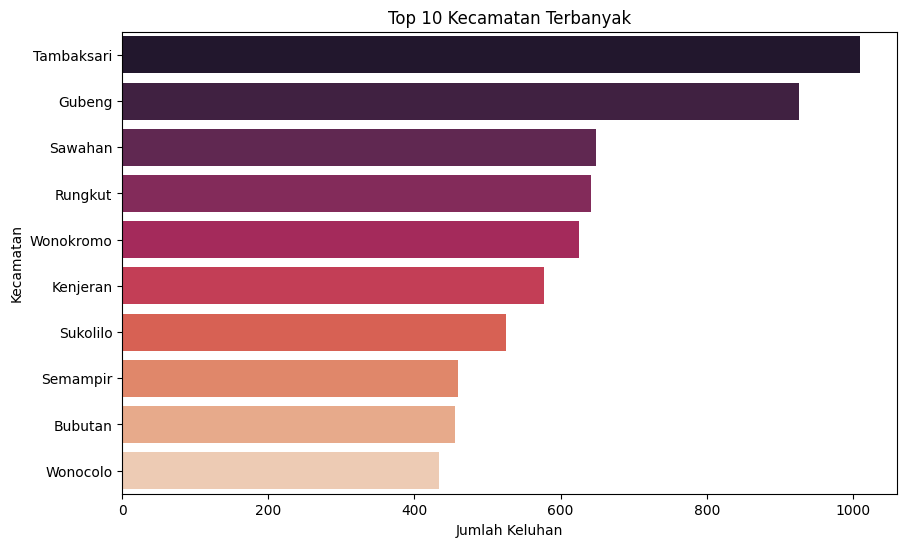

In [ ]:
# @title Top Kecamatan dan Kelurahan Terbanyak

plt.figure(figsize=(10, 6))
kecamatan_count = final_data['kecamatan'].value_counts().head(10)
sns.barplot(x=kecamatan_count.values, y=kecamatan_count.index, palette='rocket')
plt.title('Top 10 Kecamatan Terbanyak')
plt.xlabel('Jumlah Keluhan')
plt.ylabel('Kecamatan')
plt.show()

<ipython-input-39-4ef0a6c3ce1b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lokasi_count.values, y=lokasi_count.index, palette='Paired')


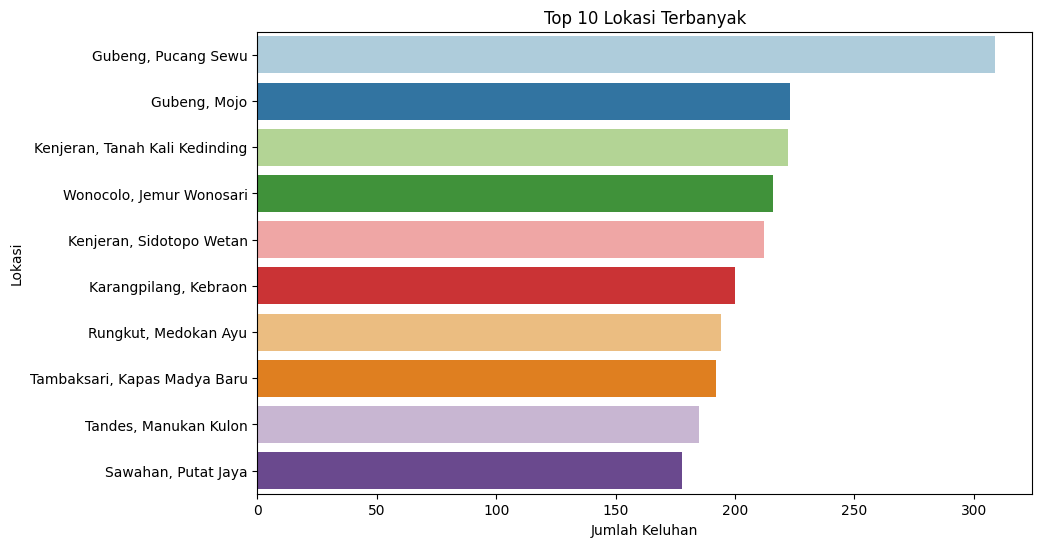

In [ ]:
# Menggabungkan kolom kecamatan dan kelurahan
final_data['lokasi'] = final_data['kecamatan'] + ', ' + final_data['kelurahan']

# Visualisasi Top Lokasi Terbanyak
plt.figure(figsize=(10, 6))
lokasi_count = final_data['lokasi'].value_counts().head(10)
sns.barplot(x=lokasi_count.values, y=lokasi_count.index, palette='Paired')
plt.title('Top 10 Lokasi Terbanyak')
plt.xlabel('Jumlah Keluhan')
plt.ylabel('Lokasi')
plt.show()

In [ ]:
lokasi_count

Gubeng, Pucang Sewu               309
Gubeng, Mojo                      223
Kenjeran, Tanah Kali Kedinding    222
Wonocolo, Jemur Wonosari          216
Kenjeran, Sidotopo Wetan          212
Karangpilang, Kebraon             200
Rungkut, Medokan Ayu              194
Tambaksari, Kapas Madya Baru      192
Tandes, Manukan Kulon             185
Sawahan, Putat Jaya               178
Name: lokasi, dtype: int64

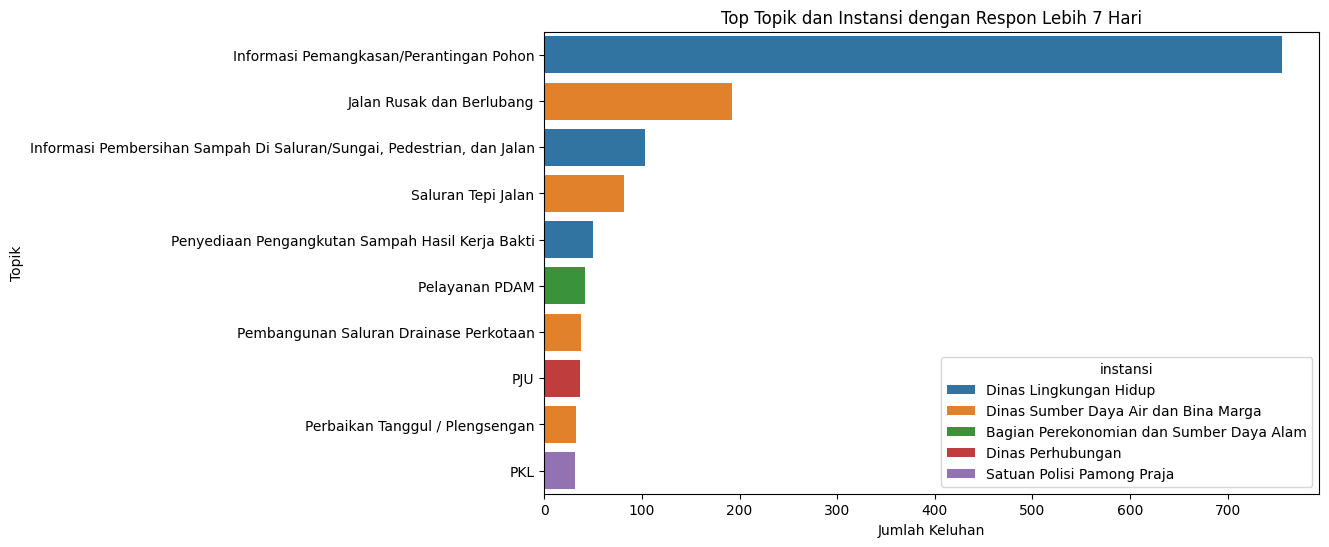

In [ ]:
# @title Top Topik dan Instansi dengan Lebih 7 Hari

plt.figure(figsize=(10, 6))
more_than_7_days = final_data[final_data['group_hari_respon_keluhan'] == 'Lebih 7 Hari']
topik_instansi_count = more_than_7_days.groupby(['topik', 'instansi']).size().reset_index(name='count')
top10_topik_instansi = topik_instansi_count.sort_values(by='count', ascending=False).head(10)
sns.barplot(x='count', y='topik', hue='instansi', data=top10_topik_instansi)
plt.title('Top Topik dan Instansi dengan Respon Lebih 7 Hari')
plt.xlabel('Jumlah Keluhan')
plt.ylabel('Topik')
plt.show()

In [ ]:
top10_topik_instansi

,topik,instansi,count
173,MBR,Dinas Sosial,624
218,PJU,Dinas Perhubungan,548
100,Jalan Rusak dan Berlubang,Dinas Sumber Daya Air dan Bina Marga,481
22,Bansos,Dinas Sosial,458
230,Pelayanan PDAM,Bagian Perekonomian dan Sumber Daya Alam,306
107,KTP-el,Dinas Kependudukan dan Pencatatan Sipil,196
224,Parkir,Dinas Perhubungan,176
65,Informasi Pemangkasan/Perantingan Pohon,Dinas Lingkungan Hidup,157
606,Saluran Tepi Jalan,Dinas Sumber Daya Air dan Bina Marga,115
278,Pelayanan Puskesmas,Dinas Kesehatan,111


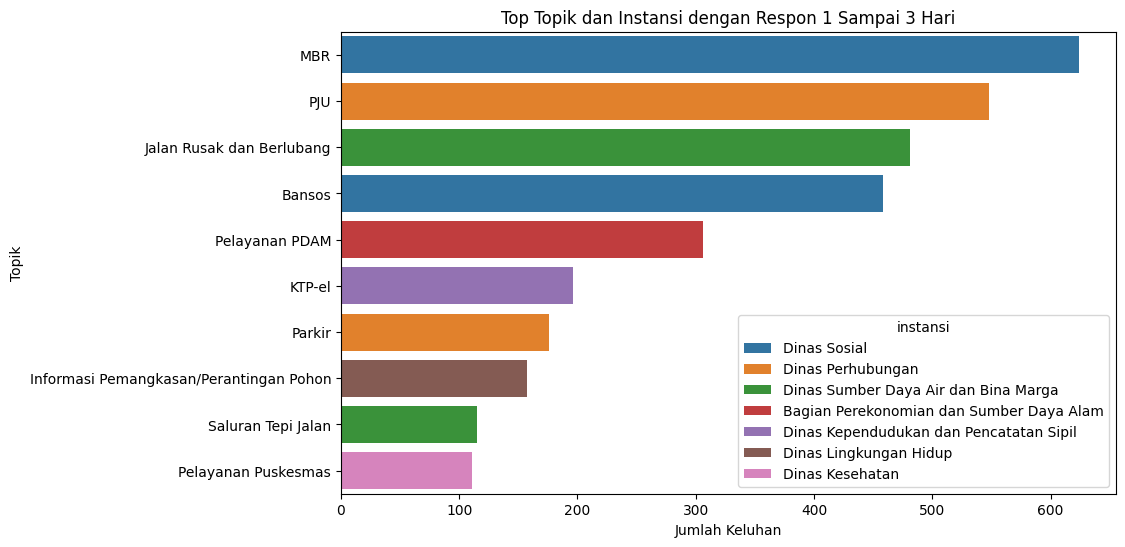

In [ ]:
# @title Top Topik dan Instansi dengan 1 Sampai 3 Hari

plt.figure(figsize=(10, 6))
between_1_to_3_days = final_data[final_data['group_hari_respon_keluhan'].isin(['1 Sampai 3 Hari'])]
topik_instansi_count = between_1_to_3_days.groupby(['topik', 'instansi']).size().reset_index(name='count')
top10_topik_instansi = topik_instansi_count.sort_values(by='count', ascending=False).head(10)
sns.barplot(x='count', y='topik', hue='instansi', data=top10_topik_instansi)
plt.title('Top Topik dan Instansi dengan Respon 1 Sampai 3 Hari')
plt.xlabel('Jumlah Keluhan')
plt.ylabel('Topik')
plt.show()

In [ ]:
top10_topik_instansi

,topik,instansi,count
37,Informasi Pemangkasan/Perantingan Pohon,Dinas Lingkungan Hidup,756
52,Jalan Rusak dan Berlubang,Dinas Sumber Daya Air dan Bina Marga,192
38,Informasi Pembersihan Sampah Di Saluran/Sungai...,Dinas Lingkungan Hidup,103
282,Saluran Tepi Jalan,Dinas Sumber Daya Air dan Bina Marga,82
146,Penyediaan Pengangkutan Sampah Hasil Kerja Bakti,Dinas Lingkungan Hidup,50
115,Pelayanan PDAM,Bagian Perekonomian dan Sumber Daya Alam,42
134,Pembangunan Saluran Drainase Perkotaan,Dinas Sumber Daya Air dan Bina Marga,38
107,PJU,Dinas Perhubungan,37
160,Perbaikan Tanggul / Plengsengan,Dinas Sumber Daya Air dan Bina Marga,33
108,PKL,Satuan Polisi Pamong Praja,31


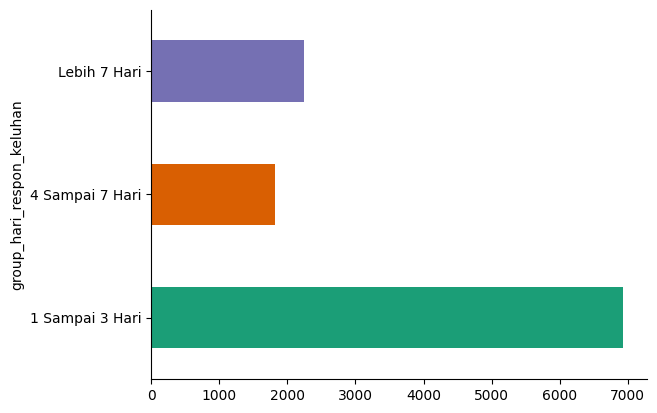

In [ ]:
# @title group_hari_respon_keluhan

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('group_hari_respon_keluhan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

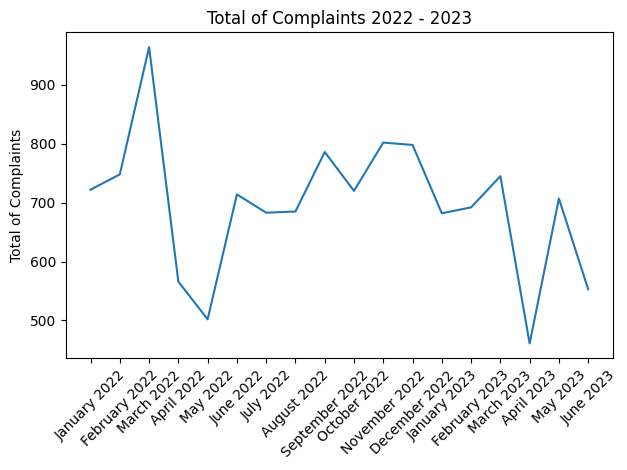

In [ ]:
# Konversi kolom 'tanggal_keluhan' ke tipe data datetime jika belum
final_data['tanggal_keluhan'] = pd.to_datetime(final_data['tanggal_keluhan'])

# Buat kolom baru untuk menyimpan bulan dan tahun dari tanggal_keluhan
final_data['bulan'] = final_data['tanggal_keluhan'].dt.month
final_data['tahun'] = final_data['tanggal_keluhan'].dt.year

# Hitung jumlah keluhan untuk setiap bulan
keluhan_per_bulan = final_data.groupby(['tahun', 'bulan']).size()

# Buat line chart
keluhan_per_bulan.plot()

# Atur label dan judul
plt.xlabel('')
plt.ylabel('Total of Complaints')
plt.title('Total of Complaints 2022 - 2023')

# Atur label sumbu x dengan nama bulan dan tahun
nama_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tahun = keluhan_per_bulan.index.get_level_values('tahun')
bulan = keluhan_per_bulan.index.get_level_values('bulan')
label_bulan_tahun = [f"{nama_bulan[bulan[i] - 1]} {tahun[i]}" for i in range(len(keluhan_per_bulan))]
plt.xticks(range(len(keluhan_per_bulan)), label_bulan_tahun, rotation=45)

# Tampilkan plot
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-29-053d0c825325>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topik_count_tertinggi.values, y=topik_count_tertinggi.index, palette='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

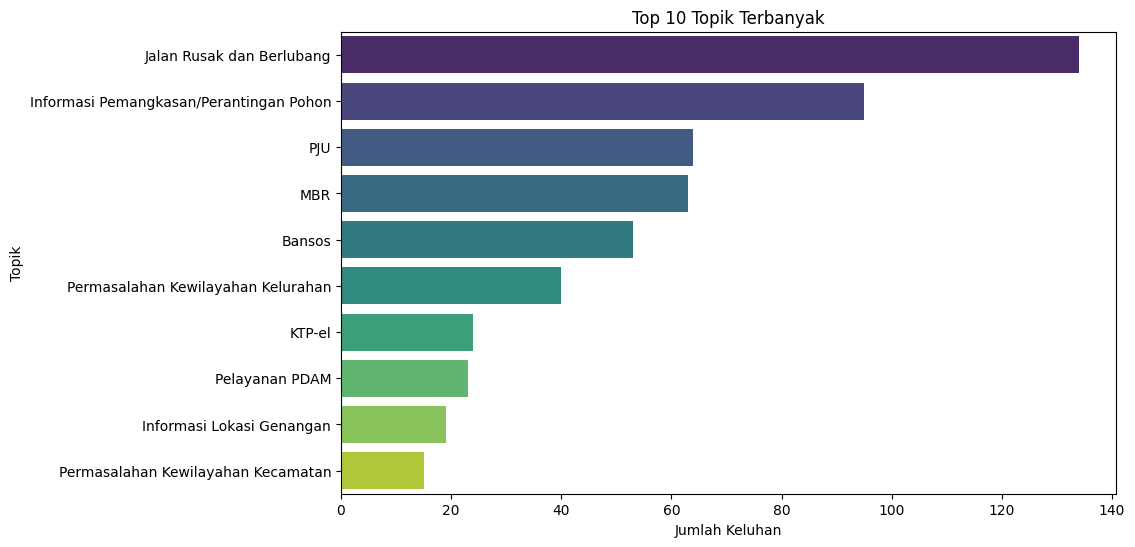

In [ ]:
tertinggi = final_data[(final_data['tahun'] == 2022) & (final_data['bulan'] == 3)]
plt.figure(figsize=(10, 6))
topik_count_tertinggi = tertinggi['topik'].value_counts().head(10)
sns.barplot(x=topik_count_tertinggi.values, y=topik_count_tertinggi.index, palette='viridis')
plt.title('Top 10 Topik Terbanyak')
plt.xlabel('Jumlah Keluhan')
plt.ylabel('Topik')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-17-fbfc042ba761>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topik_count_terendah.values, y=topik_count_terendah.index, palette='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

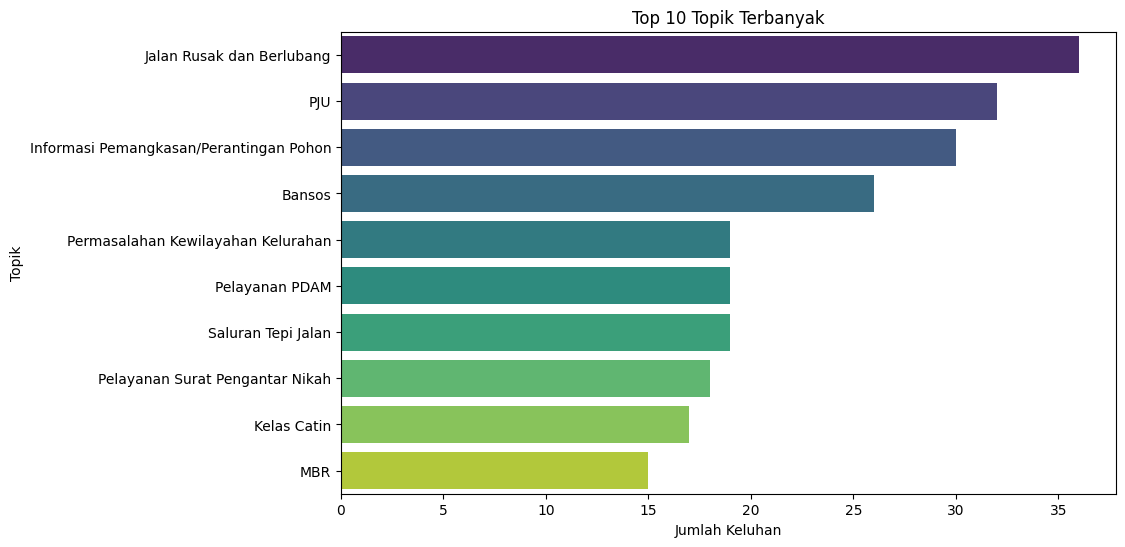

In [ ]:
terendah = final_data[(final_data['tahun'] == 2023) & (final_data['bulan'] == 4)]
plt.figure(figsize=(10, 6))
topik_count_terendah = terendah['topik'].value_counts().head(10)
sns.barplot(x=topik_count_terendah.values, y=topik_count_terendah.index, palette='viridis')
plt.title('Top 10 Topik Terbanyak')
plt.xlabel('Jumlah Keluhan')
plt.ylabel('Topik')
plt.show()